
# A/B Testing




# Caso práctico

**El Desafío (Optimizar una Campaña de Marketing)**: Imaginemos que somos parte de un equipo de marketing que gestiona una campaña publicitaria en línea para promocionar un producto o servicio. Como equipo, siempre estamos buscando formas de mejorar el rendimiento de nuestras campañas y aumentar la conversión de los usuarios en clientes. 

Para llevar a cabo este caso práctico usaremos dos conjuntos de datos, estos son: 


- Conjunto de Datos de la Campaña de Control:

   - Este conjunto de datos representa nuestra campaña tal como está configurada actualmente, es decir, el "grupo de control". Aquí, hemos estado ejecutando nuestra campaña publicitaria durante un período de tiempo determinado.

   - Contiene información sobre el gasto publicitario, el número de impresiones, el alcance, el número de clics en el sitio web, las búsquedas, las vistas de contenido, las adiciones al carrito y las compras realizadas durante varios días.

- Conjunto de Datos de la Campaña de Prueba (Test):

   - Este conjunto de datos representa una versión alternativa de nuestra campaña, el "grupo de prueba". Aquí, hemos realizado algunos cambios en nuestra estrategia publicitaria y hemos estado ejecutando esta versión durante el mismo período de tiempo que el grupo de control.
   
   - También contiene información similar al conjunto de control: gasto publicitario, impresiones, alcance, clics en el sitio web, búsquedas, vistas de contenido, adiciones al carrito y compras realizadas.

**Nuestro Objetivo**: Queremos determinar si los cambios en la estrategia de marketing tienen un impacto significativo en la conversión de usuarios en clientes. ¿La versión de prueba es realmente más efectiva o es solo una ilusión? Para responder a esta pregunta, exploraremos conceptos fundamentales de A/B Testing, como la selección de métricas adecuadas, el diseño del experimento, la recopilación de datos y la interpretación de resultados. A lo largo de esta lección, utilizaremos herramientas y técnicas de análisis de datos para tomar decisiones basadas en evidencia y mejorar nuestras estrategias de marketing.

En ambos conjuntos de datos tenemos las siguientes columnas: 


- **Campaign Name:** Esta columna indica el nombre de la campaña publicitaria o experimental a la que pertenece cada observación. En este caso, parece haber una campaña llamada "Control Campaign".

- **Date:** En esta columna se registra la fecha en la que se realizó cada observación o punto de datos. Las fechas están en formato "dd.mm.aaaa" (día.mes.año).

- **Spend [USD]:** Esta columna muestra la cantidad de dinero gastada en la campaña en dólares estadounidenses (USD) en cada día o período de observación. Representa el costo de ejecución de la campaña.

- **# of Impressions:** Aquí se registra el número de impresiones publicitarias generadas por la campaña en cada día. Una impresión es una visualización de un anuncio por parte de un usuario.

- **Reach:** Esta columna indica la cantidad de personas únicas alcanzadas por la campaña publicitaria en cada día. Es una métrica importante para medir el alcance de la campaña.

- **# of Website Clicks:** Registra el número de clics realizados en el sitio web vinculado a la campaña publicitaria en cada día. Es un indicador del tráfico generado por la campaña.

- **# of Searches:** Muestra la cantidad de búsquedas realizadas en relación con la campaña publicitaria en cada día. Puede representar el interés generado por la campaña.

- **# of View Content:** Esta columna indica el número de veces que se ha visto el contenido relacionado con la campaña en cada día. Puede referirse a páginas vistas o interacciones específicas con el contenido.

- **# of Add to Cart:** Registra la cantidad de veces que los usuarios agregaron productos al carrito de compras en el sitio web en relación con la campaña en cada día. Es una métrica relevante para el comercio electrónico.

- **# of Purchase:** Indica la cantidad de compras realizadas como resultado de la campaña publicitaria en cada día. Representa el logro principal de la campaña: la conversión de usuarios en clientes.


In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# VAMOS A VER ALGUNOS MÉTODOS DE VISUALIZACIÓN QUE NO CONOCIAMOS:

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

In [3]:
# los estilos que tenemos en sns.set_theme son
# darkgrid, whitegrid, dark, white, ticks


# los estilos que tenemos para sns.set_style son: 
# darkgrid, whitegrid, dark, white, ticks

In [4]:
# para ver los estilos de plt.style decomentar la linea de código 
# plt.style.available

In [5]:
df_control = pd.read_csv("../files/control_group.csv", sep =";")
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_test = pd.read_csv("../files/test_group.csv", sep = ";")
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


## Análisis de los datos

In [7]:
# lo primero que vamos a hacer es unir los dos DataFrames en uno solo para no tener que estar haciendo todo el trabajo por duplicado
df = pd.concat([df_control, df_test], axis = 0)
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# vamos a cambiar el nombre de las columnas para que no tengan nombres tan extraños
columnas = [col.lower().split("[")[0].replace("#", "").strip().replace(" ", "_") for col in df.columns]
df.columns = columnas

In [9]:
df.head()

,campaign_name,date,spend,of_impressions,reach,of_website_clicks,of_searches,of_view_content,of_add_to_cart,of_purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lo siguiente que vamos a hacer es crear unas columnas nuevas, el objetivo crear columnas con una serie de métricas importantes para este tipo de problemas: 

- **Tasa de Clics (*Click-Through Rate*, CTR)**: Esta es la proporción de usuarios que hacen clic en un anuncio con respecto al número total de usuarios que ven el anuncio (impresiones). Proporciona una idea de cómo de efectivo es el anuncio para captar la atención de los usuarios. Es el resultado de la división del nº clicks / impresiones

- **Tasa de Conversión (*Conversion Rate*, CR)**: Esta es la proporción de usuarios que realizan una acción deseada (por ejemplo, realizar una compra) con respecto al número total de usuarios que hicieron clic en el anuncio. Se calcula nº compras / nº clicks

- **Coste por Adquisición (*Cost Per Acquisition*, CPA)**: Este es el precio promedio que la empresa paga por cada adquisición (o compra en este caso). Lo conseguiremos dinero gastado campaña / nº compras

In [10]:
# calculamos la Tasa de Clics
df['CTR'] = df['of_website_clicks'] / df['of_impressions']

# calculamos la Tasa de Conversión
df['CR'] = df['of_purchase'] / df['of_website_clicks']

# calculamos el Coste por Adquisición
df['CPA'] = df['spend'] / df['of_purchase']

# mostramos el DataFrame para confirmar que todo ha ido bien. 
df.head()

,campaign_name,date,spend,of_impressions,reach,of_website_clicks,of_searches,of_view_content,of_add_to_cart,of_purchase,CTR,CR,CPA
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,0.088084,3.689320
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.067003,0.063009,3.438356
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.049411,0.057160,6.298387
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.042057,0.110930,5.705882
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# una vez que tengamos nuestro DataFrame preparado con todas las columnas que queremos vamos a crear una función que no haga una exploración inicial del conjunto de datos
def exploracion_dataframe(dataframe, columna_control):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas, agrupadas por la columna de control.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.
    - columna_control (str): El nombre de la columna que se utilizará como control para dividir el DataFrame.

    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    
    # como estamos en un problema de A/B testing y lo que realmente nos importa es comparar entre el grupo de control y el de test, los principales estadísticos los vamos a sacar de cada una de las categorías
    
    for categoria in dataframe[columna_control].unique():
        
        dataframe_filtrado = dataframe[dataframe[columna_control] == categoria]
    
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)

In [12]:
exploracion_dataframe(df,"campaign_name")

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
of_impressions,1.666667
reach,1.666667
of_website_clicks,1.666667
of_searches,1.666667
of_view_content,1.666667
of_add_to_cart,1.666667
of_purchase,1.666667
CTR,1.666667
CR,1.666667
CPA,1.666667



 ..................... 

Los tipos de las columnas son:


,tipo_dato
campaign_name,object
date,object
spend,int64
of_impressions,float64
reach,float64
of_website_clicks,float64
of_searches,float64
of_view_content,float64
of_add_to_cart,float64
of_purchase,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna CAMPAIGN_NAME tiene las siguientes valore únicos:


,campaign_name
Control Campaign,30
Test Campaign,30


La columna DATE tiene las siguientes valore únicos:


,date
1.08.2019,2
2.08.2019,2
29.08.2019,2
28.08.2019,2
27.08.2019,2



 ..................... 

Los principales estadísticos de las columnas categóricas para el CONTROL CAMPAIGN son: 


,count,unique,top,freq
campaign_name,30,1,Control Campaign,30
date,30,30,1.08.2019,1



 ..................... 

Los principales estadísticos de las columnas numéricas para el CONTROL CAMPAIGN son: 


,count,mean,std,min,25%,50%,75%,max
spend,30.0,2288.433333,367.334451,1757.000000,1945.500000,2299.500000,2532.000000,3083.000000
of_impressions,29.0,109559.758621,21688.922908,71274.000000,92029.000000,113430.000000,121332.000000,145248.000000
reach,29.0,88844.931034,21832.349595,42859.000000,74192.000000,91579.000000,102479.000000,127852.000000
of_website_clicks,29.0,5320.793103,1757.369003,2277.000000,4085.000000,5224.000000,6628.000000,8137.000000
of_searches,29.0,2221.310345,866.089368,1001.000000,1615.000000,2390.000000,2711.000000,4891.000000
of_view_content,29.0,1943.793103,777.545469,848.000000,1249.000000,1984.000000,2421.000000,4219.000000
of_add_to_cart,29.0,1300.000000,407.457973,442.000000,930.000000,1339.000000,1641.000000,1913.000000
of_purchase,29.0,522.793103,185.028642,222.000000,372.000000,501.000000,670.000000,800.000000
CTR,29.0,0.050959,0.020508,0.018575,0.036186,0.047202,0.067003,0.088309
CR,29.0,0.114772,0.068383,0.033494,0.063009,0.102275,0.143839,0.322354



 ..................... 

Los principales estadísticos de las columnas categóricas para el TEST CAMPAIGN son: 


,count,unique,top,freq
campaign_name,30,1,Test Campaign,30
date,30,30,1.08.2019,1



 ..................... 

Los principales estadísticos de las columnas numéricas para el TEST CAMPAIGN son: 


,count,mean,std,min,25%,50%,75%,max
spend,30.0,2563.066667,348.687681,1968.000000,2324.500000,2584.000000,2836.250000,3112.000000
of_impressions,30.0,74584.800000,32121.377422,22521.000000,47541.250000,68853.500000,99500.000000,133771.000000
reach,30.0,53491.566667,28795.775752,10598.000000,31516.250000,44219.500000,78778.750000,109834.000000
of_website_clicks,30.0,6032.333333,1708.567263,3038.000000,4407.000000,6242.500000,7604.750000,8264.000000
of_searches,30.0,2418.966667,388.742312,1854.000000,2043.000000,2395.500000,2801.250000,2978.000000
of_view_content,30.0,1858.000000,597.654669,858.000000,1320.000000,1881.000000,2412.000000,2801.000000
of_add_to_cart,30.0,881.533333,347.584248,278.000000,582.500000,974.000000,1148.500000,1391.000000
of_purchase,30.0,521.233333,211.047745,238.000000,298.000000,500.000000,701.000000,890.000000
CTR,30.0,0.102423,0.067709,0.029824,0.053130,0.080359,0.128493,0.338218
CR,30.0,0.092312,0.044490,0.030088,0.065683,0.084543,0.116684,0.210851


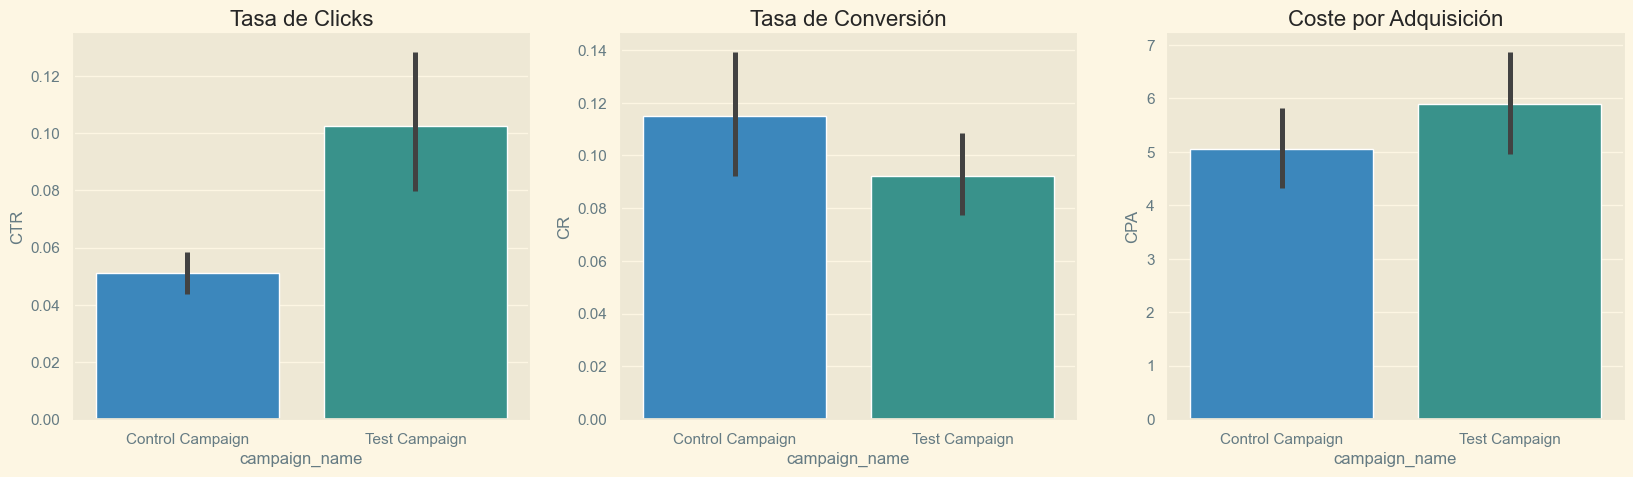

In [13]:
# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Gráfico 1: Tasa de Clicks (CTR)
sns.barplot(x="campaign_name", y="CTR", data=df, ax=axes[0])
axes[0].set_title("Tasa de Clicks")

# Gráfico 2: Tasa de Conversión (CR)
sns.barplot(x="campaign_name", y="CR", data=df, ax=axes[1])
axes[1].set_title("Tasa de Conversión")

# Gráfico 3: Costo por Adquisición (CPA)
sns.barplot(x="campaign_name", y="CPA", data=df, ax=axes[2])
axes[2].set_title("Coste por Adquisición");

**Interpretación de las gráficas**

El CTR es más alto en el grupo de prueba, lo que indica que el anuncio en el grupo de prueba captura mejor la atención de los usuarios. Sin embargo, la Tasa de Conversión es ligeramente más alta en el grupo de control, lo que significa que la proporción de usuarios que realmente realizan una compra después de hacer clic en el anuncio es mayor en el grupo de control. El CPA también es más alto en el grupo de prueba, lo que implica que la empresa está pagando más por cada adquisición en el grupo de prueba en comparación con el grupo de control.


**NOTA**: Para poder realizar correctamente este tipo de análisis es necesario que no haya nulos en nuestro conjunto de datos. Por lo que antes de seguir, procederemos a gestionarlos como aprendimos en el la lección de nulos. 


In [14]:
# recordemos cuántos nulos tenemos y en que porcentaje están para decidir correctamente que método de imputación usamos:
# solo tenemos nulos en variables numéricas, por lo que solo lo haremos para este tipo de variables
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['of_impressions', 'reach', 'of_website_clicks', 'of_searches',
       'of_view_content', 'of_add_to_cart', 'of_purchase', 'CTR', 'CR', 'CPA'],
      dtype='object')


In [15]:
# como en todos los casos tenemos menos de un 5% de nulos, optaremos por reemplazar por la media o la mediana, para elegir la mejor métrica hagamos un 'decribe()' para decidir que estadístico es mejor
df[nulos_esta_num].describe().T.loc[:, ["mean", "50%"]]

,mean,50%
of_impressions,91775.881356,95843.000000
reach,70868.644068,76219.000000
of_website_clicks,5682.593220,5691.000000
of_searches,2321.813559,2390.000000
of_view_content,1900.169492,1975.000000
of_add_to_cart,1087.220339,1075.000000
of_purchase,522.000000,501.000000
CTR,0.077127,0.063799
CR,0.103352,0.088084
CPA,5.483144,4.789668


Algunos valores difieren entre la media y la mediana, como es el caso de `of_impressions`, `reach`, `of_purchase`, `CTR`, `CR`, `CPA`. En estos casos, lo correcto sería reemplazar por la mediana. En el resto de las columnas, podríamos reeamplazar por la media o la mediana. Para simplificar el problema, reemplazaremos por la mediana  en todas las columnas. 

In [16]:
# reemplazamos los valores nulos
for columna in nulos_esta_num:
    mediana = df[columna].median()
    df[columna] = df[columna].fillna(mediana)
    
# comprobamos que ya no queden valores nulos
df.isnull().sum()

campaign_name        0
date                 0
spend                0
of_impressions       0
reach                0
of_website_clicks    0
of_searches          0
of_view_content      0
of_add_to_cart       0
of_purchase          0
CTR                  0
CR                   0
CPA                  0
dtype: int64

## Pruebas estadísticas

El siguiente paso es realizar el test estadístico correspondiente para evaluar si estas diferencias son los suficientemente grandes para considerar que hay diferencia entre los grupos. Pero como hemos visto al inicio de la lección, antes de lanzarnos con el test tendremos que ver si cumplen con una serie de asunciones o supuestos, para elegir el más correcto. Recordemos que tenemos que evaluar si se cumplen los supuestos de: 

- Normalidad

- Homogeneidad de varianzas

- Independecia de las observaciones

![esquema](https://github.com/Adalab/data_imagenes/blob/main/Modulo-3/AB-testing/supuestos-esquema.png?raw=true)

### Normalidad

El test de Shapiro-Wilk se utiliza para evaluar si una muestra de datos sigue una distribución normal. En Python, puedes realizar este test utilizando la función `shapiro` de la biblioteca `scipy.stats`. La sintaxis básica es la siguiente:

```python
from scipy.stats import shapiro

# Sintaxis básica del test de Shapiro-Wilk
statistic, p_value = shapiro(data)
```

Donde:

- `shapiro` es la función que realiza el test de Shapiro-Wilk.

- `data` es la muestra de datos que deseas evaluar para la normalidad.

La función `shapiro` devuelve dos valores:

- `statistic`: El valor estadístico del test de Shapiro-Wilk, que se utiliza para evaluar si los datos siguen una distribución normal. Cuanto mayor sea este valor, más probable es que los datos sean normales.

- `p_value`: El valor p (p-value) asociado al test de Shapiro-Wilk, que indica cuán significativa es la desviación de la normalidad. Un valor p pequeño sugiere que los datos no siguen una distribución normal.

Para interpretar los resultados:

- Si el p-value > 0.05, lo que sugiere que los datos siguen una distribución normal.

- Si el p-value < 0.05, lo que sugiere que los datos no siguen una distribución normal.



In [17]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

    

In [18]:
metricas = ['CTR', 'CR', 'CPA']

for metrica in metricas:
    normalidad(df ,metrica)

Para la columna CTR los datos no siguen una distribución normal.
Para la columna CR los datos no siguen una distribución normal.
Para la columna CPA los datos no siguen una distribución normal.


### Homogeneidad de Varianzas

Como hemos visto, el test de Levene se utiliza para evaluar la homogeneidad de varianza entre dos o más grupos de datos. En otras palabras, se utiliza para determinar si las varianzas en estos grupos son aproximadamente iguales o si hay diferencias significativas entre ellas. La sintaxis básica para realizar el test de Levene es la siguiente:

```python
from scipy.stats import levene

# Sintaxis básica del test de Levene
statistic, p_value = levene(group1, group2, group3, ...)
```

Donde:

- `levene`: Es la función que realiza el test de Levene.

- `group1`, `group2`, `group3`, ...:  Son los grupos de datos que deseas comparar. Es decir, cada uno de los valores únicos que tiene la columna (en nuestro caso Control Campaign y Test Campaign)

La función `levene` devuelve dos valores:

- `statistic`: El valor estadístico del test de Levene, que se utiliza para evaluar la homogeneidad de varianza.

- `p_value`: El valor p (p-value) asociado al test de Levene, que indica cuán significativas son las diferencias en las varianzas entre los grupos.

Para interpretar los resultados:

- Si el p-value > 0.05, sugiere que no hay evidencia significativa de diferencias en las varianzas entre los grupos. Esto indica homogeneidad de varianza. ESTO ES LO QUE BUSCAMOS NOSTRAS.

- Si el p-value < 0.05, sugiere que hay diferencias significativas en las varianzas entre los grupos. Esto indica falta de homogeneidad de varianza.

In [19]:

def homogeneidad (dataframe, columna, columna_metrica):
    
    """
    Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna que se utilizará para dividir los datos en grupos.
    - columna_metrica (str): El nombre de la columna que se utilizará para evaluar la homogeneidad de las varianzas.

    Returns:
    No devuelve nada directamente, pero imprime en la consola si las varianzas son homogéneas o no entre los grupos.
    Se utiliza la prueba de Levene para evaluar la homogeneidad de las varianzas. Si el valor p resultante es mayor que 0.05,
    se concluye que las varianzas son homogéneas; de lo contrario, se concluye que las varianzas no son homogéneas.
    """
    
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")


In [20]:
metricas = ['CTR', 'CR', 'CPA']

for metrica in metricas:
    homogeneidad(df ,'campaign_name', metrica)

Para la métrica CTR, las varianzas no son homogéneas entre grupos.
Para la métrica CR las varianzas son homogéneas entre grupos.
Para la métrica CPA las varianzas son homogéneas entre grupos.


### Independencia


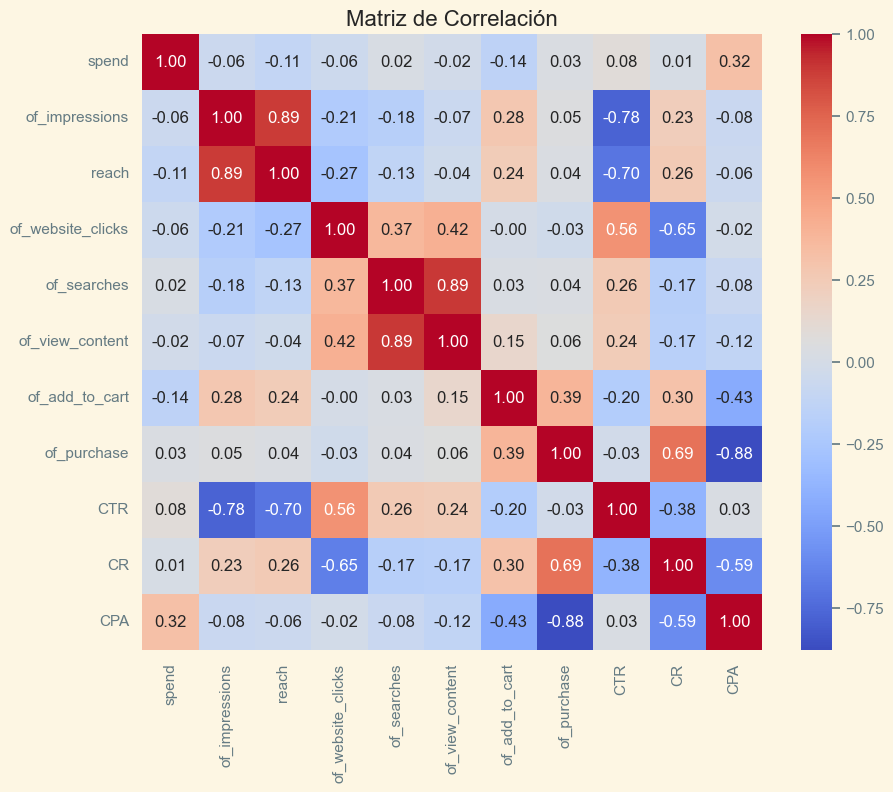

Prueba de Chi-cuadrado - p-valor: 1.0
Prueba t para CTR entre Control y Test - p-valor: 0.0002109485585857722


In [21]:
# Visualizar la matriz de correlación con tamaño ajustado
correlacion_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Realizar la prueba de chi-cuadrado para evaluar la independencia de dos variables categóricas
contingency_table = pd.crosstab(df['campaign_name'], df['date'])
chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
print(f"Prueba de Chi-cuadrado - p-valor: {p_chi2}")

# Realizar una prueba t para comparar las medias de dos grupos (por ejemplo, Control vs. Test)
control_group = df[df['campaign_name'] == 'Control Campaign']
test_group = df[df['campaign_name'] == 'Test Campaign']
t_stat, p_ttest = ttest_ind(control_group['CTR'], test_group['CTR'])
print(f"Prueba t para CTR entre Control y Test - p-valor: {p_ttest}")

Resumiendo, parece que nuestros datos no cumplen el supuesto de normalidad ni el de homogeneidad, por lo que tendremos que optar por pruebas no paramétricas como el **Test de Mann Whitney**.  Este test es una prueba estadística no paramétrica utilizada para comparar dos muestras independientes y determinar si provienen de poblaciones con medianas iguales o diferentes. Como ya hemos dicho, esta prueba es apropiada cuando los datos no siguen una distribución normal y se utiliza para evaluar si hay diferencias significativas entre dos grupos. En Python, podemos realizar el test de Mann-Whitney utilizando la función `mannwhitneyu` de la biblioteca `scipy.stats`. Aquí está la sintaxis básica:

```python
from scipy.stats import mannwhitneyu

# Sintaxis básica del test de Mann-Whitney
statistic, p_value = mannwhitneyu(grupo1, grupo2)
```

Donde:
- `mannwhitneyu`: Es la función que realiza el test de Mann-Whitney.

- `grupo1` y `grupo2`: Son las dos muestras que deseas comparar. Estas muestras pueden ser listas, arrays NumPy o una columna de un DataFrame. En nuestro caso, los grupos serán el grupo test y el control. 

La función `mannwhitneyu`: Devuelve dos valores:

- `statistic`: El valor estadístico del test de Mann-Whitney, que se utiliza para evaluar si las medianas de las dos muestras son iguales o diferentes.

- `p_value`: El valor p (p-value) asociado al test de Mann-Whitney, que indica cuán significativas son las diferencias entre las muestras. Un valor p pequeño sugiere que las medianas son significativamente diferentes.

Para interpretar los resultados:

- Si p-value < 0.05, sugiere que hay diferencias significativas entre las medianas de las muestras.

- Si p-value > 0.05, sugiere que no hay evidencia suficiente para concluir que las medianas son diferentes.

In [23]:
# vamos a crear una función para calcular este test y ver si hay diferencias entre los grupos de estudio

def test_man_whitney(dataframe, columnas_metricas, grupo_control, grupo_test, columna_grupos = "campaign_name"):

    """
    Realiza la prueba de Mann-Whitney U para comparar las medianas de las métricas entre dos grupos en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columnas_metricas (list): Una lista de nombres de columnas que representan las métricas a comparar entre los grupos.
    - grupo_control (str): El nombre del grupo de control en la columna especificada por columna_grupos.
    - grupo_test (str): El nombre del grupo de test en la columna especificada por columna_grupos.
    - columna_grupos (str): El nombre de la columna que contiene la información de los grupos. Por defecto, "campaign_name".

    Returns 
    No devuelve nada directamente, pero imprime en la consola si las medianas son diferentes o iguales para cada métrica.
    Se utiliza la prueba de Mann-Whitney U para evaluar si hay diferencias significativas entre los grupos.
    """
    # filtramos el DataFrame para quedarnos solo con los datos de control
    control = dataframe[dataframe[columna_grupos] == grupo_control]
    
    # filtramos el DataFrame para quedarnos solo con los datos de control
    test = dataframe[dataframe[columna_grupos] == grupo_test]
    
    
    # iteramos por las columnas de las metricas para ver si para cada una de ellas hay diferencias entre los grupos
    for metrica in columnas_metricas:
        
        # filtrams el conjunto de datos para quedarnos solo con la columna de la metrica que nos interesa
        metrica_control = control[metrica]
        metrica_test = test[metrica]
        
        # aplicamos el estadístico
        u_statistic, p_value = stats.mannwhitneyu(metrica_control, metrica_test)
        
        if p_value < 0.05:
            print(f"Para la métrica {metrica}, las medianas son diferentes.")
        else:
            print(f"Para la métrica {metrica}, las medianas son iguales.")
            
    

## llamamos a la función
test_man_whitney(df, metricas, "Control Campaign", "Test Campaign" )

Para la métrica CTR, las medianas son diferentes.
Para la métrica CR, las medianas son iguales.
Para la métrica CPA, las medianas son iguales.


## Interpretación de los resultados

- El CTR del grupo de prueba es significativamente diferente al del grupo de control. 

- No existe una diferencia significativa en la CR y el CPA entre los dos grupos, ya que los p-valores son mayores que 0.05.

> **Conclusión**: Resultado del análisis visual y estadístico de los datos podemos decir que la campaña de prueba logra captar con éxito más atención y estimula a los usuarios a hacer clic en el anuncio. Sin embargo, una vez que los usuarios hacen clic en el anuncio, su probabilidad de realizar una compra es similar en ambas campañas. Además, los gastos asociados con la adquisición de un cliente también son similares en ambas campañas.

**NOTA** En la lección hemos puesto en práctica un ejemplo de puebra no parámetrica, pero hemos visto que hay otro tipo de pruebas que podemos hacer en función de si se cumplen los supuestos o no. A parte de este jupyter tenéis un jupyter adicional para saber como deberíamos proceder en caso de que tengamos que elegir otra de las pruebas. Este segundo jupyter no es obligatorio leerlo, es una guía para saber como proceder en cada una de las posibles situaciones en las que nos podemos encontrar. 